In [1]:
import numpy as np
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)
import pandas as pd

In [3]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]

Saving wine.csv to wine.csv


In [4]:
import pandas as pd
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [5]:
np.unique(df.values[:,-1], return_counts= True)

(array([0., 1.]), array([4898, 1599]))

In [6]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.values[:,:-1])

In [7]:
X_scaled[:3]

array([[ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
        -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
        -0.91546416, -0.93722961],
       [ 0.45103572,  3.28223494, -2.19283252, -0.59764007,  1.1979747 ,
        -0.31132009, -0.86246863,  0.70148631, -0.11507303,  0.99957862,
        -0.58006813, -0.93722961],
       [ 0.45103572,  2.55330026, -1.91755268, -0.66069923,  1.02669737,
        -0.87476278, -1.09248586,  0.76818761,  0.25811972,  0.79795816,
        -0.58006813, -0.93722961]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.values[:,-1], stratify = df.values[:,-1], random_state = seed
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872,), (1625,))

- 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
    Dense(30, input_dim=12, activation= 'relu'),  # Hiddem Layer
    Dense(12, activation= 'relu'), 
    Dense(8, activation= 'relu'),               # Output Layer
    Dense(1, activation= 'sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


- 모델 저장관련 설정

In [13]:
import os
if not os.path.exists('model'): # 모델이란 폴더가 없으면 모델 만들어!
    os.mkdir('model')

In [14]:
# model_path = 'model/best_wine.h5'값으로 주는것이 편하다.

model_path = 'model/wine_{epoch:03d}_{val_loss:.4f}.h5'


In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [16]:
checkpoint = ModelCheckpoint(
    model_path, monitor= 'val_loss', verbose = 1, save_best_only = True
)

- 모델 학습 및 저장


In [20]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',         # 이진분류여서'binary_crossentropy'
    metrics=['accuracy']                       

)

In [21]:
hist = model.fit(
    X_train,  y_train, validation_split = 0.2, epochs =200, batch_size = 50, verbose =0, callbacks=[checkpoint]
)


Epoch 00001: val_loss improved from inf to 0.07850, saving model to model/wine_001_0.0785.h5

Epoch 00002: val_loss improved from 0.07850 to 0.04025, saving model to model/wine_002_0.0402.h5

Epoch 00003: val_loss improved from 0.04025 to 0.03001, saving model to model/wine_003_0.0300.h5

Epoch 00004: val_loss improved from 0.03001 to 0.02709, saving model to model/wine_004_0.0271.h5

Epoch 00005: val_loss improved from 0.02709 to 0.02353, saving model to model/wine_005_0.0235.h5

Epoch 00006: val_loss improved from 0.02353 to 0.02248, saving model to model/wine_006_0.0225.h5

Epoch 00007: val_loss improved from 0.02248 to 0.02071, saving model to model/wine_007_0.0207.h5

Epoch 00008: val_loss did not improve from 0.02071

Epoch 00009: val_loss improved from 0.02071 to 0.01994, saving model to model/wine_009_0.0199.h5

Epoch 00010: val_loss improved from 0.01994 to 0.01938, saving model to model/wine_010_0.0194.h5

Epoch 00011: val_loss did not improve from 0.01938

Epoch 00012: val_

- 베스트 모델 로딩한 후 평가

In [23]:
from tensorflow.keras.models import load_model
best_model_path = 'model/wine_133_0.0017.h5'
best_model = load_model(best_model_path)
best_model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 1ms/step - loss: 0.0116 - accuracy: 0.9969


[0.011586986482143402, 0.9969230890274048]

In [24]:
y_acc = hist.history['accuracy'][:200]
y_vloss = hist.history['val_loss'][:200]
xs = np.arange(1,len(y_acc)+1)


In [29]:

import matplotlib.pyplot as plt

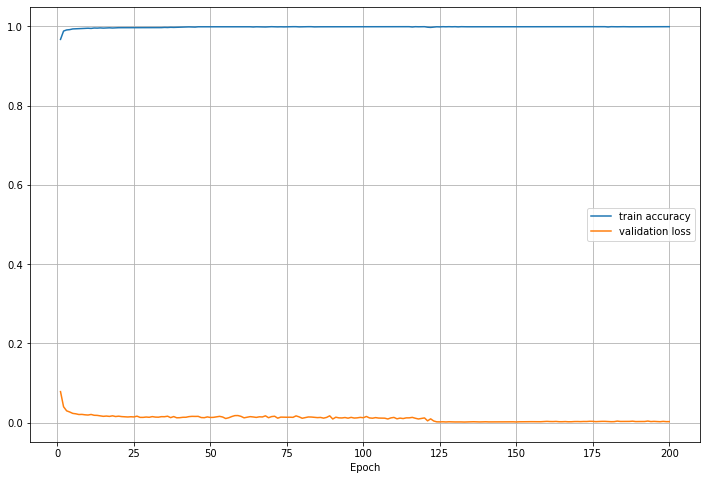

In [30]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, ms =5, label = 'train accuracy')
plt.plot(xs, y_vloss, ms = 5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()